# Made by: Chetan, AIT AIML 1, 18BCS6056

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train = pd.read_csv(r'C:\Users\JMD\OneDrive\Desktop\Training_Set.csv')       # Reading the Training dataset
df_valid = pd.read_csv(r'C:\Users\JMD\OneDrive\Desktop\Validation_Set.csv')     # Reading the Validation dataset

In [3]:
print(df_train.head(5),'\n') # For Training set
df_valid.head(5)             # For validation set

   Attribute 1 (a1)  Attribute 2 (a2)  Class Label
0                 2                11            2
1                 2                13            2
2                 2                15            2
3                 2                27            1
4                 2                39            1 



,Attribute 1 (a1),Attribute 2 (a2),True Class Label,Class Label as predicted by the decision tree
0,2,35,1,1
1,12,13,2,1
2,-4,45,2,2
3,2,17,2,2


In [4]:
print('|| For Training set ||', '\n',df_train.nunique(),'\n')       #to print number of unique values of training set
print('|| For Validation set || \n',df_valid.nunique())             #to print number of unique values of validation set

|| For Training set || 
 Attribute 1 (a1)    6
Attribute 2 (a2)    5
Class Label         2
dtype: int64 

|| For Validation set || 
 Attribute 1 (a1)                                 3
Attribute 2 (a2)                                 4
True Class Label                                 2
Class Label as predicted by the decision tree    2
dtype: int64


In [5]:
print(df_train.isnull().values.any(),'\n')          # Check if there are any null values in Training set
print(df_train.isnull().sum())                      # If there are any null values print the total sum of null values in each column

False 

Attribute 1 (a1)    0
Attribute 2 (a2)    0
Class Label         0
dtype: int64


In [6]:
print(df_valid.isnull().values.any(),'\n')          # Check if there are any null values in Validation set
print(df_valid.isnull().sum())                      # If there are any null values print the total sum of null values in each column

False 

Attribute 1 (a1)                                 0
Attribute 2 (a2)                                 0
True Class Label                                 0
Class Label as predicted by the decision tree    0
dtype: int64


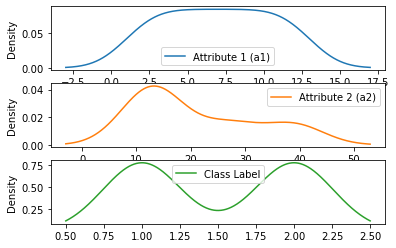

In [7]:
df_train.plot(kind='density',subplots=True,sharex=False) 
# it tells that data is normalized, box and Whisker plots won't be helpful due to less number of data points
plt.show()

### Below 3 cells are for training set

In [8]:
X_train = df_train.drop("Class Label", axis=1)      # X_train has features 
Y_test = df_train["Class Label"]                    # X_test is the target variable

In [9]:
Y_test1= pd.DataFrame(Y_test ,columns=['Class Label'])      # X_test didn't had column name, so we made this ammend in X_test1 

In [10]:
print('|| Taregt || \n',Y_test1.head(3),'\n')       # For target feature of training dataset
print('|| Features || \n',X_train.head(3))          # For Features or attributes of training set

|| Taregt || 
    Class Label
0            2
1            2
2            2 

|| Features || 
    Attribute 1 (a1)  Attribute 2 (a2)
0                 2                11
1                 2                13
2                 2                15


### Below 3 cells are for validation set

In [11]:
X_valid = df_valid.drop(["True Class Label","Class Label as predicted by the decision tree"], axis=1)    # X_valid has features 
Y_valid = df_valid["True Class Label"]                                                                   # Y_valid is the target variable

In [12]:
Y_valid1= pd.DataFrame(Y_valid ,columns=['True Class Label'])

In [13]:
print('|| Taregt || \n',Y_valid1.head(3),'\n')      # For target feature of validation dataset
print('|| Features || \n',X_valid.head(4))          # For Features or attributes of validation set

|| Taregt || 
    True Class Label
0                 1
1                 2
2                 2 

|| Features || 
    Attribute 1 (a1)  Attribute 2 (a2)
0                 2                35
1                12                13
2                -4                45
3                 2                17


In [14]:
from sklearn.tree import DecisionTreeClassifier

In [15]:
model = DecisionTreeClassifier(max_depth=20, min_samples_split=10, min_samples_leaf=5,criterion='gini') # making the model
model.fit(X_train, Y_test1) # training the model on training dataset

#NOTE: here parameters like max_depth, min_samples_split etc were already given in question, to find these parameters on our own we will # make use of cross-validation

DecisionTreeClassifier(max_depth=20, min_samples_leaf=5, min_samples_split=10)

In [16]:
Y_pred = model.predict(X_valid) # predicting the value using validation dataset's feature variables as input

In [17]:
from sklearn.metrics import confusion_matrix as cm
cm1 = cm(Y_valid,Y_pred)
print(cm1)

[[0 1]
 [2 1]]


In [18]:
from sklearn.metrics import classification_report as cr
cr1 = cr(Y_valid,Y_pred)
print(cr1)

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.50      0.33      0.40         3

    accuracy                           0.25         4
   macro avg       0.25      0.17      0.20         4
weighted avg       0.38      0.25      0.30         4



In [19]:
from sklearn.metrics import accuracy_score as acc
acc1 = acc(Y_valid, Y_pred)
print(acc1)

0.25


In [20]:
from sklearn.metrics import f1_score
fs = f1_score(Y_valid, Y_pred)
print(fs)

0.0


In [61]:
from sklearn import tree

[Text(581.25, 990.9375, 'a2 <= 21.0\ngini = 0.5\nsamples = 30\nvalue = [15, 15]'),
 Text(290.625, 707.8125, 'a1 <= 5.0\ngini = 0.401\nsamples = 18\nvalue = [13, 5]'),
 Text(145.3125, 424.6875, 'gini = 0.5\nsamples = 6\nvalue = [3, 3]'),
 Text(435.9375, 424.6875, 'a1 <= 9.0\ngini = 0.278\nsamples = 12\nvalue = [10, 2]'),
 Text(290.625, 141.5625, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(581.25, 141.5625, 'gini = 0.444\nsamples = 6\nvalue = [4, 2]'),
 Text(871.875, 707.8125, 'a1 <= 7.0\ngini = 0.278\nsamples = 12\nvalue = [2, 10]'),
 Text(726.5625, 424.6875, 'gini = 0.444\nsamples = 6\nvalue = [2, 4]'),
 Text(1017.1875, 424.6875, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]')]

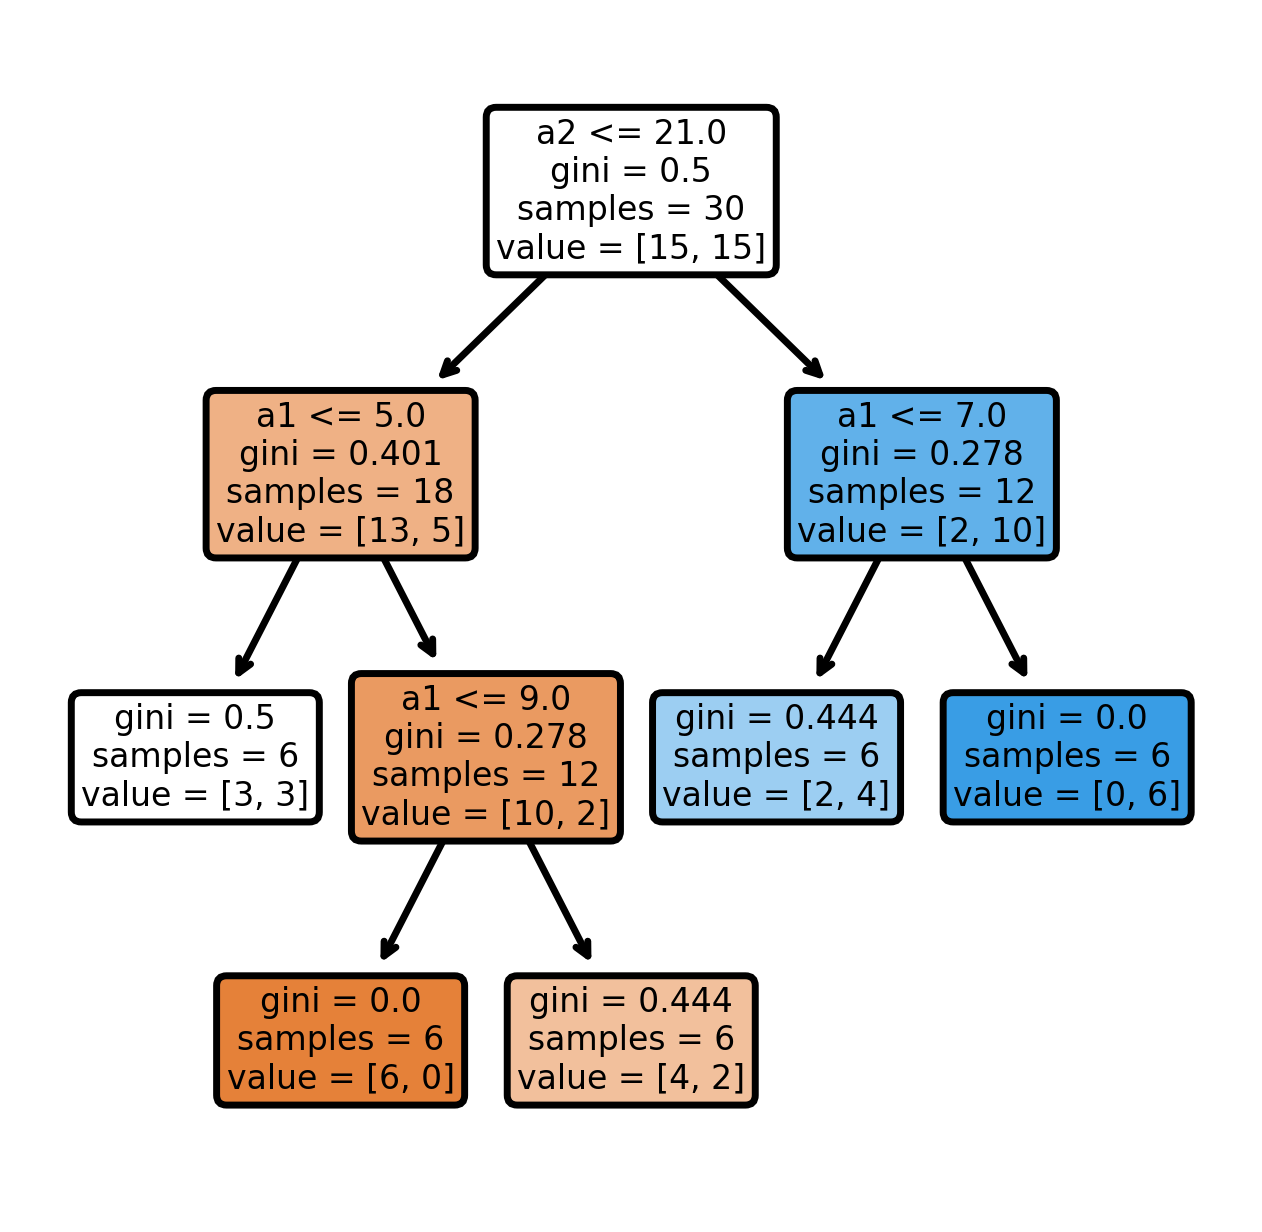

In [62]:
fig, axes = plt.subplots(figsize = (3,3), dpi=500) # here we have 2 more attributes 'nrows' and 'ncols' values of both are by deafult 1
tree.plot_tree(model, feature_names=['a1','a2'],filled=True,rounded=True) # or use 'features_names = df_train[0:2]'